<a href="https://colab.research.google.com/github/Unstopable18/Deep-Learning/blob/main/Transfer_Learning_Feature_extraction_Fine_Tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [35]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [36]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [37]:
import tensorflow as tf
from tensorflow import keras
from keras import  Sequential
from keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [38]:
train=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/train',labels='inferred',label_mode='int',batch_size=32,image_size=(150,150)
)

test=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/test',labels='inferred',label_mode='int',batch_size=32,image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [39]:
def process(image,label):
    image=tf.cast(image/256.,tf.float32)
    return image,label
train=train.map(process)
test=test.map(process)

In [40]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [41]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [42]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [44]:
conv_base.trainable=False

In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
history = model.fit(train,epochs=10,validation_data=test)

Epoch 1/10
121/625 [====>.........................] - ETA: 34s - loss: 0.3668 - accuracy: 0.8412

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## Data Augmentation

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train=test_datagen.flow_from_directory(
    directory='/content/dogs_vs_cats/train',class_mode='binary',batch_size=32,target_size=(150,150)
)

test=test_datagen.flow_from_directory(
    directory='/content/dogs_vs_cats/test',class_mode='binary',batch_size=32,target_size=(150,150)
)

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

In [ ]:
conv_base.trainable = False

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train, epochs=10, validation_data=test)

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## Fine Tunning

In [48]:
train=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/train',labels='inferred',label_mode='int',batch_size=32,image_size=(150,150)
)

test=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/test',labels='inferred',label_mode='int',batch_size=32,image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [49]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [50]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_5 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [51]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [52]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [53]:
def process(image,label):
    image=tf.cast(image/255.,tf.float32)
    return image,label
train=train.map(process)
test=test.map(process)

In [55]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [56]:
history = model.fit(train,epochs=10,validation_data=test)

Epoch 1/10
625/625 [==============================] - 76s 118ms/step - loss: 0.2387 - accuracy: 0.8979 - val_loss: 0.1626 - val_accuracy: 0.9318
Epoch 2/10
625/625 [==============================] - 73s 117ms/step - loss: 0.1350 - accuracy: 0.9463 - val_loss: 0.1311 - val_accuracy: 0.9464
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.0941 - accuracy: 0.9653 - val_loss: 0.1351 - val_accuracy: 0.9446
Epoch 4/10
625/625 [==============================] - 73s 117ms/step - loss: 0.0649 - accuracy: 0.9771 - val_loss: 0.1206 - val_accuracy: 0.9496
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.0441 - accuracy: 0.9860 - val_loss: 0.1216 - val_accuracy: 0.9522
Epoch 6/10
625/625 [==============================] - 73s 117ms/step - loss: 0.0288 - accuracy: 0.9922 - val_loss: 0.1500 - val_accuracy: 0.9466
Epoch 7/10
625/625 [==============================] - 73s 117ms/step - loss: 0.0178 - accuracy: 0.9957 - val_loss: 0.1480 - val_ac

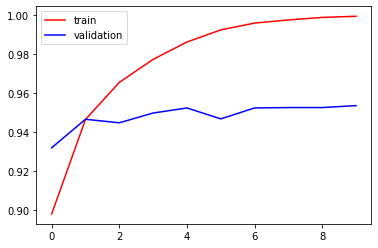

In [57]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

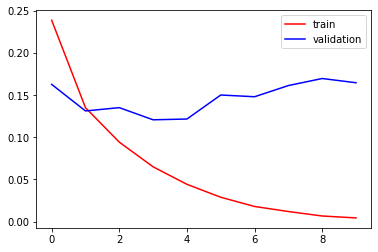

In [58]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()